In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from datasets import load_dataset
import texthero as hero

mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('max_colwidth', 100)

In [11]:
dataset = load_dataset("SetFit/bbc-news", split = 'train+test')
df = pd.DataFrame.from_dict(dataset[:])

'''
df = (df.groupby('label', group_keys = False)
        .apply(lambda x: x.sample(frac=0.1))
        .reset_index(drop = True)) '''

#label_dict = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
#label_dict = {0: 'Negative', 1: 'Positive'}
#df['label'] = df['label'].map(label_dict)  

df.head(10)

Using custom data configuration SetFit--bbc-news-dbeb222bfdd4d6ed
Found cached dataset json (C:/Users/jtoli/.cache/huggingface/datasets/SetFit___json/SetFit--bbc-news-dbeb222bfdd4d6ed/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)


text  \
0  wales want rugby league training wales could follow england s lead by training with a rugby leag...   
1  china aviation seeks rescue deal scandal-hit jet fuel supplier china aviation oil has offered to...   
2  rock band u2 break ticket record u2 have smashed irish box office records with ticket sales for ...   
3  markets signal brazilian recovery the brazilian stock market has risen to a record high as inves...   
4  tough rules for ringtone sellers firms that flout rules on how ringtones and other mobile extras...   
5  iraq advice claim sparks new row the tories say ministers must respond in parliament to claims t...   
6  brits debate over  urban  music joss stone  a 17-year-old soul singer from devon  beat dizzee ra...   
7  dirty den s demise seen by 14m more than 14 million people saw  dirty  den watts killed off on f...   
8  lib dems  new election pr chief the lib dems have appointed a senior figure from bt to be the pa...   
9  bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world serv...   

   label     label_text  
0      2          sport  
1      1       business  
2      3  entertainment  
3      1       business  
4      0           tech  
5      4       politics  
6      3  entertainment  
7      3  entertainment  
8      4       politics  
9      1       business

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        2225 non-null   object
 1   label       2225 non-null   int64 
 2   label_text  2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


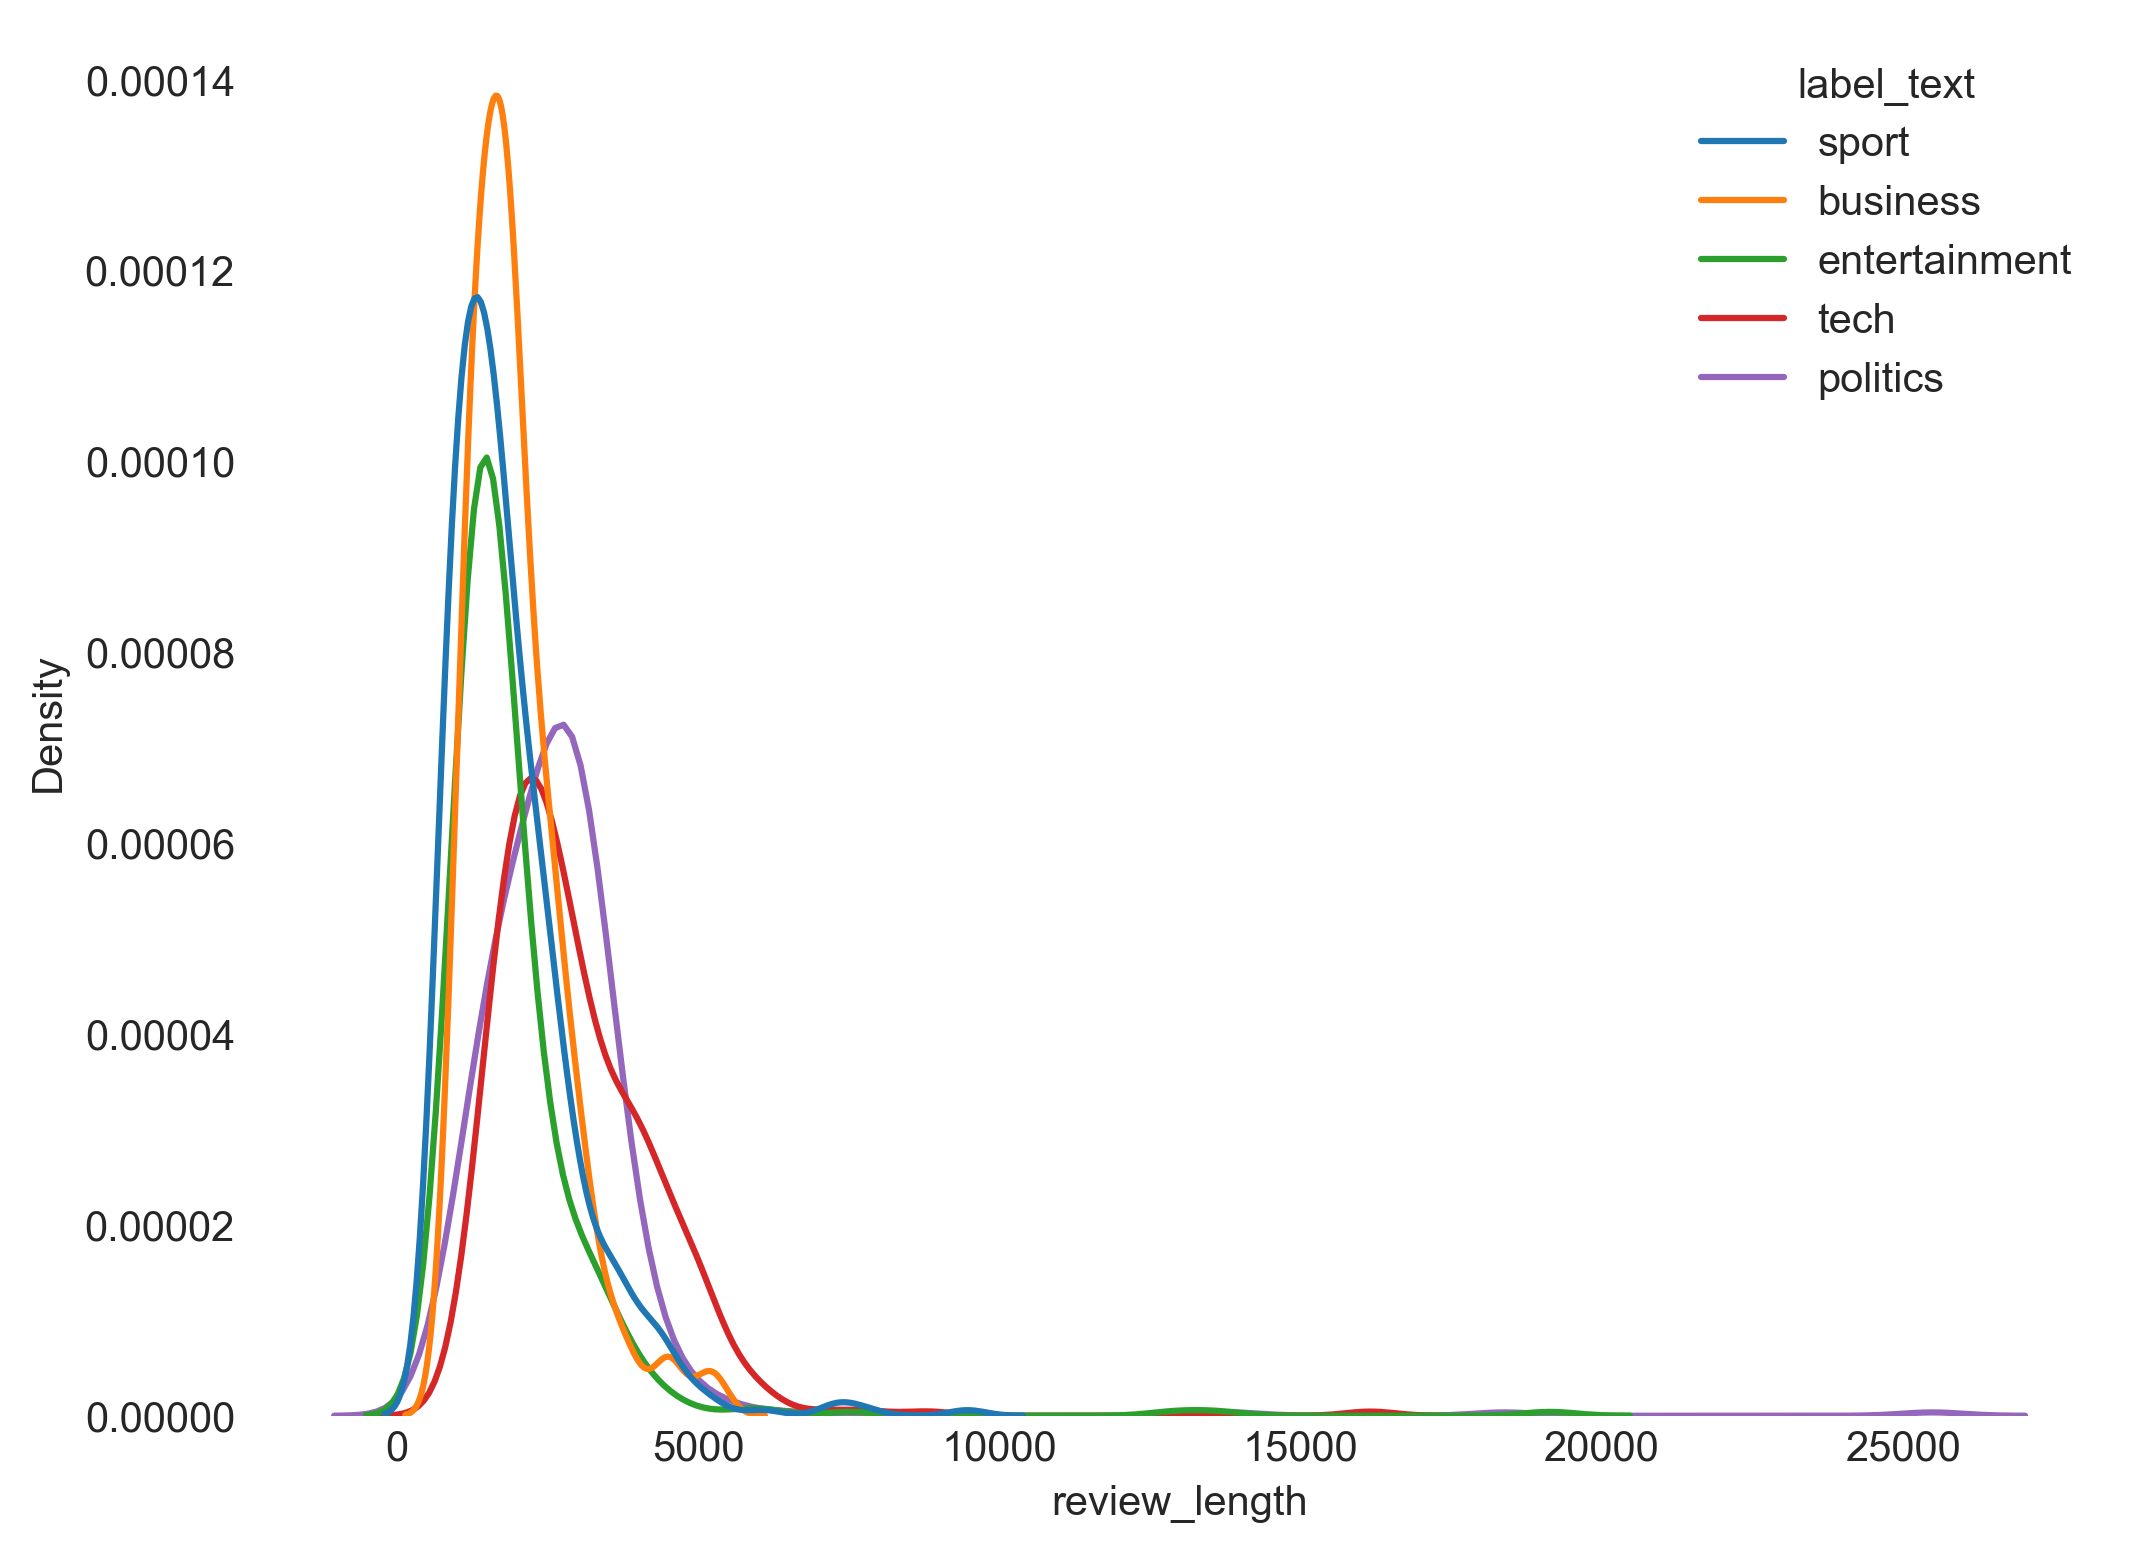

In [111]:
df['review_length'] = df['text'].str.len()

fig, ax = plt.subplots(figsize = (8,6))
ax.grid(False)
ax.set_frame_on(False)

sns.kdeplot(df, x="review_length", hue="label_text",
            fill=False, ax = ax)

plt.show()

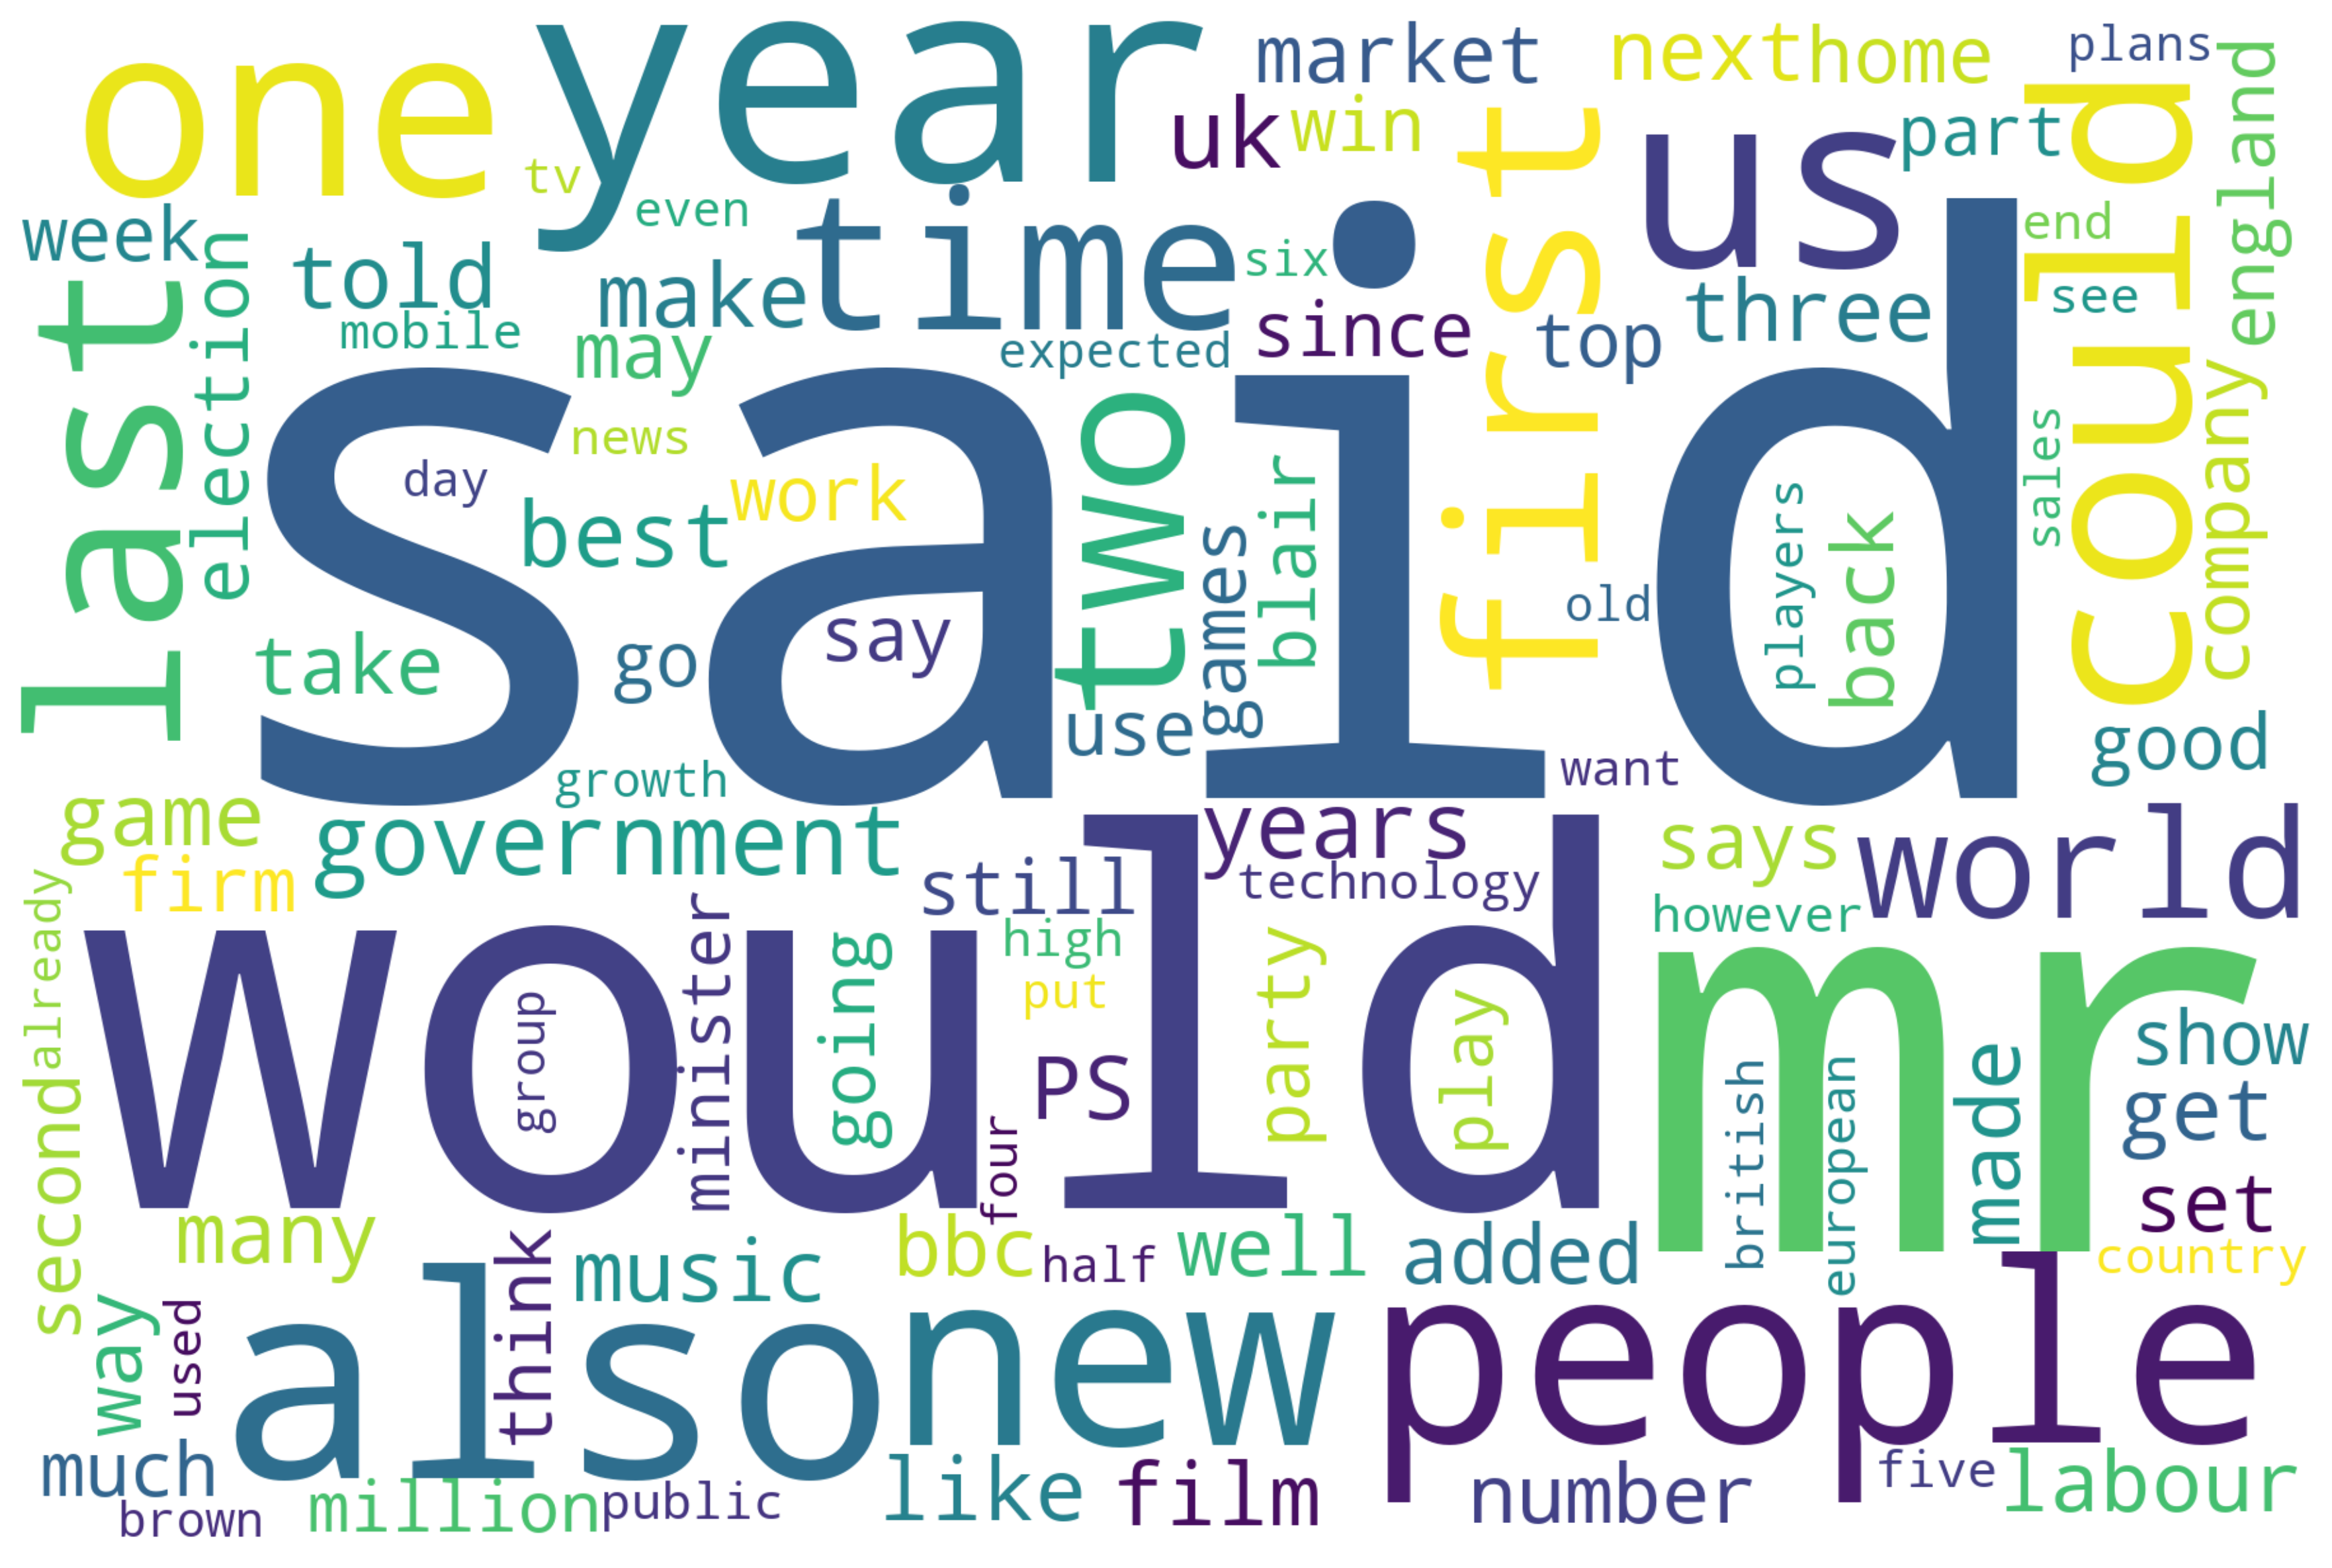

In [14]:
df['clean_text'] = hero.clean(df['text'])

hero.wordcloud(df['clean_text'],
               width = 1800, height = 1200, max_words = 100,
               background_color = 'white', colormap = 'viridis')

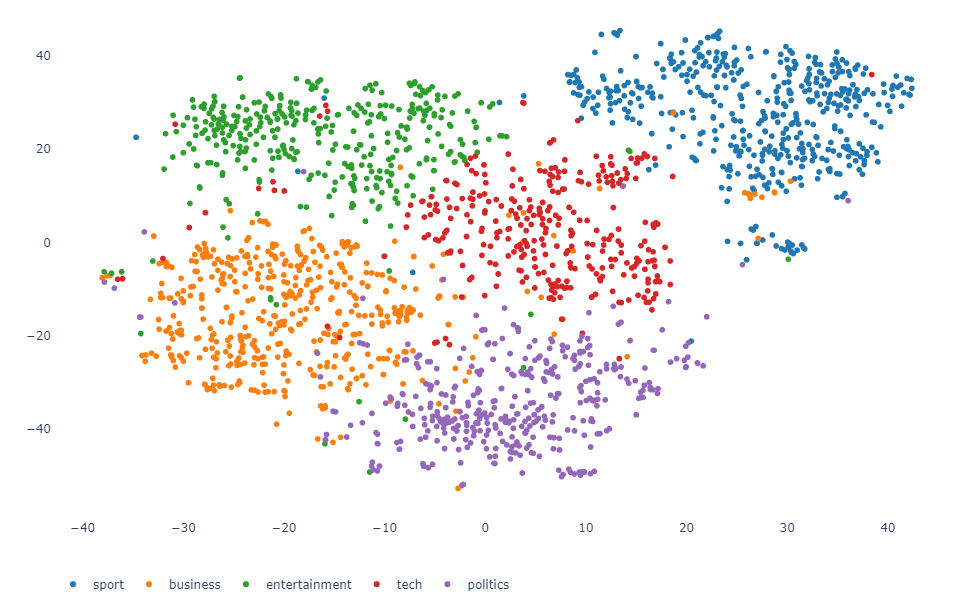

In [103]:
df['dr'] = (
    df['text']
    .pipe(hero.clean)
    .pipe(hero.tfidf, max_features = 1000)
    #.pipe(hero.pca, n_components = 2)
    .pipe(hero.tsne, n_components = 2, perplexity = 80)
)

df['dim1'], df['dim2'] = zip(*df['dr'].to_list())

df['text_wrap'] = df['text'].str[:300]
df['text_wrap'] = df['text_wrap'].str.wrap(50)
df['text_wrap'] = df['text_wrap'].str.replace('\n','<br>', regex=False)

fig = px.scatter(df, x='dim1', y='dim2', color='label_text',
                 hover_data = ['text_wrap'], 
                 color_discrete_sequence=px.colors.qualitative.D3) 

fig.update_layout(xaxis_title = '', yaxis_title = '',
                  height = 600,
                  plot_bgcolor = 'white',
                  legend = dict(orientation = 'h', title = ''),
                  margin=dict(l=1, r=1, t=1, b=1, pad=1))

fig.show()